<img src="../dsi.png" style="height:128px;">

# Lesson 1: Why Data Science?

Welcome to the interactive Jupyter Notebook-based component of Data Science for India! Each week, we're going to practice what we covered in the worksheets with *programs* on the computer. We talked a lot about how computers are useful when working with data, so let's close out today's session with an example.

Today we're going to look at some data, and how we can *visualize* it! Along the way, we'll learn about Jupyter Notebooks and how to use them. In this notebook, you will also see some lines of *code*. Code is something that a machine can understand and *interpret*, or make sense of. 

Just like you know how to speak languages like English, Hindi, and many more, you'll soon know how to write code in a language called Python. Python is just one of the many languages computers can understand! For today, you won't need to write any code unless you are curious and want to play around (go ahead!). Instead, just look at a few of the cool things we can do with data science.

Run each "cell", or block of code, by pressing the keys "Shift" and "Enter" at the same time. 

In [2]:
# Below we have `import` statements, which help us set up the notebook! 
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Some lines of code are equal to a value. In Jupyter notebooks, we actually get to see what the result of the last line of code is equal to.

Here, we're going to read a *table* of data about the quality of different bodies of water all over India. You might recognize some of these rivers and lakes. In fact, you might have even been there!


The *rows* (displayed sideways) of the table represent the location where the measurements were taken, and the *columns* (displayed vertically), show the different types of measurements. You might even recognize some from chemistry class.

In [18]:
water = Table().read_table("water_quality.csv")
#Data from: https://data.gov.in/catalog/status-water-quality-india-2008-and-2011
water

Station Code,Water Quality,Locations,State Name,TEMPERATURE (degree Centigrade)-Minimum,TEMPERATURE (degree Centigrade)-Maximum,TEMPERATURE (degree Centigrade)-Mean,Dissolved Oxygen(D.O.) (mg/l)-Minimum,Dissolved Oxygen(D.O.) (mg/l)-Maximum,Dissolved Oxygen(D.O.) (mg/l)-Mean,pH-Minimum,pH-Maximum,pH-Mean,CONDUCTIVITY (µmhos/cm)-Minimum,CONDUCTIVITY (µmhos/cm)-Maximum,CONDUCTIVITY (µmhos/cm)-Mean,Biochemical oxygen demand (B.O.D.) (mg/l)-Minimum,Biochemical oxygen demand (B.O.D.) (mg/l)-Maximum,Biochemical oxygen demand (B.O.D.) (mg/l)-Mean,NITRATE- N+ NITRITE-N (mg/l)-Minimum,NITRATE- N+ NITRITE-N (mg/l)-Maximum,NITRATE- N+ NITRITE-N (mg/l)-Mean,FECAL COLIFORM (MPN/100ml)-Minimum,FECAL COLIFORM (MPN/100ml)-Maximum,FECAL COLIFORM (MPN/100ml)-Mean,TOTAL COLIFORM (MPN/100ml)-Minimum,TOTAL COLIFORM (MPN/100ml)-Maximum,TOTAL COLIFORM (MPN/100ml)-Mean,FLUORIDE(mg/l)-Minimum,FLUORIDE(mg/l)-Maximum,FLUORIDE(mg/l)-Mean
1001,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT UPSTREAM MANALI""",Himachal Pradesh,2.5,14,9,8.4,10.3,9,7.2,8,8,68,101,85,0.1,0.3,0.1,0.06,0.42,0.2,0,920,106,11,2400,397,nan,nan,nan
1002,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM KULU""",Himachal Pradesh,5.6,14,10,8,10.2,9,7.1,8.3,8,69,165,102,0.2,0.4,0.3,0.04,0.89,0.4,33,350,153,160,2400,954,nan,nan,nan
1003,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM AUT""",Himachal Pradesh,5,14.1,11,8.2,10.5,9,7.3,8.5,8,65,178,96,0.1,0.5,0.2,0.04,0.64,0.3,2,140,58,27,2400,653,nan,nan,nan
1004,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT UPSTREAM PANDON DAM""",Himachal Pradesh,5.5,18,13,8.1,10.6,9,7,8.2,8,56,130,94,0.1,0.2,0.2,0.24,0.71,0.4,7,79,34,34,920,317,nan,nan,nan
1005,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT EXIT OF TUNNEL DEHAL POWER HOUSE""",Himachal Pradesh,5,21,14,7.9,12,10,7.3,8.4,8,56,227,112,0.1,0.4,0.2,0.08,0.69,0.5,23,920,213,160,2400,1072,nan,nan,nan
1550,"""WATER QUALITY OF RIVER- BEAS""","""UPSTREAM MANDI""",Himachal Pradesh,6,20,16,7.1,11.1,9,7.2,8.7,8,66,164,117,0.1,0.4,0.2,0.01,1.39,0.5,17,350,100,220,2400,722,nan,nan,nan
1006,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM MANDI""",Himachal Pradesh,6.5,21,16,7.8,10.3,9,7.4,8.4,8,86,220,155,0.2,0.6,0.5,0.08,1.53,0.7,27,920,445,540,2400,1855,nan,nan,nan
2604,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM JAISINGHPUR""",Himachal Pradesh,8.9,22,19,7.8,9,8,7.5,8.7,8,97,361,211,0.2,0.8,0.5,0.15,1.46,0.5,4,11,7,22,170,72,nan,nan,nan
1007,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM ALAMPUR""",Himachal Pradesh,20,22,19,8.3,9.1,8,8.2,8.9,8,130,356,202,1,1,0.6,0.1,1.18,0.4,6,14,9,94,280,123,nan,nan,nan
1008,"""WATER QUALITY OF RIVER- BEAS""","""BEAS AT DOWNSTREAM DEHRAGOPIPUR""",Himachal Pradesh,9,24,19,7.5,9.6,8,7.1,8.4,8,124,638,280,0.1,1.1,0.7,0,7.07,1.1,0,21,10,12,540,157,nan,nan,nan


Of course, the Jupyter notebook won't show us *all* the data points. Let's see how many locations were part of the survey. 

To give us a little bit more information, let's look at the states where data was taken.

In [13]:
print("Data was taken at " + str(water.num_rows) + " locations" + " in " +
      str(water.group("State Name").num_rows) + " states.")
water.group("State Name")

Data was taken at 1692 locations in 30 states.


State Name,count
Andhra Pradesh,96
Assam,100
Bihar,86
Chandigarh,9
Chhattisgarh,24
Delhi,12
Goa,29
Gujarat,58
Haryana,18
Himachal Pradesh,103


Let's see if we can figure out some information about the temperature of the water from each state. Because there were multiple sites in each state, we need to find the value that's most representative of data from the entire state.
Thus, we'll take the *average* of each column. The *average*, or *mean*, is a number that represents the center of a group of numbers. We can now *visualize* this data with a *bar graph*.

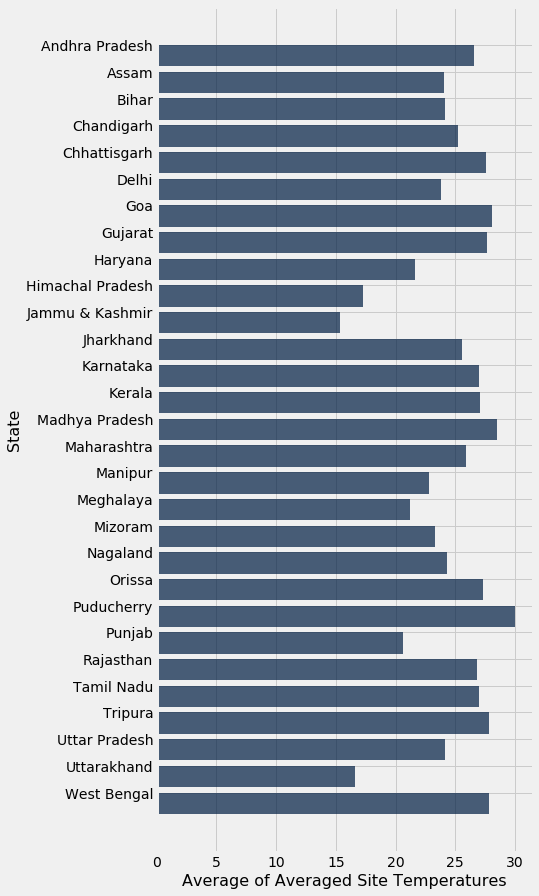

In [14]:
grouped = water.where(water.column(6), lambda x : x == x).group("State Name", np.average)
temperatures = Table().with_columns("State", grouped.column(0),
                                   "Average of Minimum Site Temperatures", grouped.column(4),
                                   "Average of Maximum Site Temperatures", grouped.column(5),
                                   "Average of Averaged Site Temperatures", grouped.column(6))
temperatures.barh("State", "Average of Averaged Site Temperatures")

The table also contains information on the amount of coliform bacteria detected in the water. This is extremely important to know, beacause it shows that some sites have more germs than others and where you're more likely to get sick as a result of using the water without purifying it before. It'll be helpful for doctors and public health officials to know what diseases are being caused due to infected water.

This table shows reports of the cases for certain diseases by state.

In [19]:
disease = Table.read_table("diseases.csv")
#Source: https://data.gov.in/keywords/acute-diarrhoeal-diseases
disease

Year,State/UTs,Acute Diarrhoeal Diseases - Cases,Acute Diarrhoeal Diseases - Deaths,Malaria - Cases,Malaria - Deaths,Acute Respiaratory Infection - Cases,Acute Respiaratory Infection - Deaths,Japanese Encephalitis - Cases,Japanese Encephalitis - Deaths,Viral Hepatitis - Cases,Viral Hepatitis - Deaths
2011(P),GRAND TOTAL,10231049,1269,1278760,463,26300208,2492,8249,1169,94402,520
2011(P),Andhra Pradesh,2235614,107,39559,5,3089290,236,73,1,11050,61
2011(P),Arunachal Pradesh,32228,11,10961,nan,48602,9,nan,nan,636,4
2011(P),Assam,96816,16,47397,42,314824,nan,1319,250,2557,25
2011(P),Bihar,130276,nan,2390,0,87486,nan,821,197,202,nan
2011(P),Chhattisgarh,64575,5,131179,18,155743,18,nan,nan,139,1
2011(P),Delhi,102983,62,413,nan,198541,102,9,nan,8347,68
2011(P),Goa,15146,2,1231,1,61029,6,91,1,118,nan
2011(P),Gujarat,367450,0,86005,15,604076,nan,nan,nan,4328,nan
2011(P),Haryana,224223,21,33345,1,1275035,48,90,14,2557,2


Now, we'll need to analyze the data from both tables, so we'll do the following: *group* bacterial content by state (find the average), and *join* the two tables.

In [16]:
def clean(tbl, col_1, col_2):
    cleaned_col_1 = tbl.where(tbl.column(col_1), lambda x : x == x)
    return cleaned_col_1.where(cleaned_col_1.column(col_2), lambda x: x == x)


cleaned = clean(water, 24, 27)
bacteria = Table().with_columns("State Name", cleaned.column(3),
                    "Fecal Coliform", cleaned.column(24),
                    "Total Coliform", cleaned.column(27))
grouped = bacteria.group("State Name", np.average)
grouped

State Name,Fecal Coliform average,Total Coliform average
Andhra Pradesh,159.326,1002.43
Assam,237.475,1294.14
Bihar,1307.81,3429.77
Chhattisgarh,270,186.75
Delhi,4.73283e+07,1.28065e+08
Goa,7.83333,149.25
Gujarat,456.556,1295.31
Haryana,42723.7,183530
Himachal Pradesh,94.6087,459.505
Jharkhand,224.444,1350


In [17]:
joined_avgs = grouped.join("State Name", disease, "State/UTs")
joined_avgs

State Name,Fecal Coliform average,Total Coliform average,Year,Acute Diarrhoeal Diseases - Cases,Acute Diarrhoeal Diseases - Deaths,Malaria - Cases,Malaria - Deaths,Acute Respiaratory Infection - Cases,Acute Respiaratory Infection - Deaths,Japanese Encephalitis - Cases,Japanese Encephalitis - Deaths,Viral Hepatitis - Cases,Viral Hepatitis - Deaths
Andhra Pradesh,159.326,1002.43,2011(P),2235614,107,39559,5,3089290,236,73,1,11050,61
Assam,237.475,1294.14,2011(P),96816,16,47397,42,314824,nan,1319,250,2557,25
Bihar,1307.81,3429.77,2011(P),130276,nan,2390,0,87486,nan,821,197,202,nan
Chhattisgarh,270,186.75,2011(P),64575,5,131179,18,155743,18,nan,nan,139,1
Delhi,4.73283e+07,1.28065e+08,2011(P),102983,62,413,nan,198541,102,9,nan,8347,68
Goa,7.83333,149.25,2011(P),15146,2,1231,1,61029,6,91,1,118,nan
Gujarat,456.556,1295.31,2011(P),367450,0,86005,15,604076,nan,nan,nan,4328,nan
Haryana,42723.7,183530,2011(P),224223,21,33345,1,1275035,48,90,14,2557,2
Himachal Pradesh,94.6087,459.505,2011(P),310227,51,247,nan,1484149,154,nan,nan,1248,10
Jharkhand,224.444,1350,2011(P),98258,1,152061,16,205496,5,303,19,384,2


The code below will help us make a graph with the presence of all the diseases based on the amount of bacteria in the water.

In [18]:
def make_plot(ax, tbl, xcol, ycol):
    if type(ycol) == int:
        lbl = tbl.labels[ycol]
    else:
        lbl = ycol
    ax.scatter(tbl.column(xcol), tbl.column(ycol), label=lbl)
    return lbl

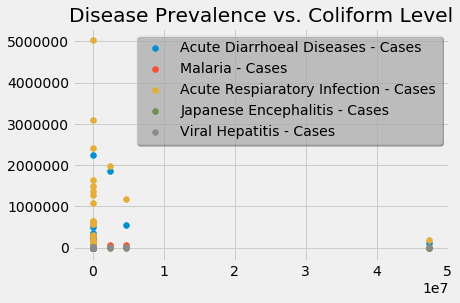

In [19]:
fig, ax = plt.subplots()
ax.set_title('Disease Prevalence vs. Coliform Level')
labels = []
for disease in joined_avgs.labels[4:14:2]:
    labels.append(make_plot(ax, joined_avgs, 'Fecal Coliform average', disease))
leg = ax.legend(loc='upper right', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)
shown = {}
for legentry, axentry in zip(leg.get_label(), labels):
    legentry.set_picker(5)
    shown[legentry] = axentry
    

def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

    
fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

**Conclusion:**
Here, we learned about the average water temperature and tried to see how the prevalence of a disease is affected by the amount of coliform bacteria in water (bacteria definitely does contribute to some diseases)

Data science isn't just good for looking at water quality, you can use it to look at so many other areas! Now, we're going to look at work that our team did at UC Berkeley, where they investigated how much the world has changed over the years. They did this in their introductory data science class and by the end of this course, you'll be able to do some of it too!

Full project at: https://github.com/data-8/data8assets/tree/gh-pages/materials/sp17/project/project1

## Population Growth, Fertility, and Poverty over Time

This table contains data about the population(amount of people living in a place) from every country in the world! The column "geo" is a three-letter code for a country, "time" is a year, and "population_total" is the amount of people recorded to be living in that country at that year.


In [4]:
population = Table.read_table('population.csv')

#Source: https://github.com/open-numbers/ddf--gapminder--systema_globalis/raw/master/ddf--datapoints--population_total--by--geo--time.csv

population


geo,time,population_total
abw,1800,19286
abw,1801,19286
abw,1802,19286
abw,1803,19286
abw,1804,19286
abw,1805,19286
abw,1806,19286
abw,1807,19286
abw,1808,19286
abw,1809,19286


Let's now just look the data for India (code ind) and see how much the population has grown since the year 1800.

In [5]:
india = population.where("geo", are.equal_to("ind")).where("time", are.between(1800, 2017))

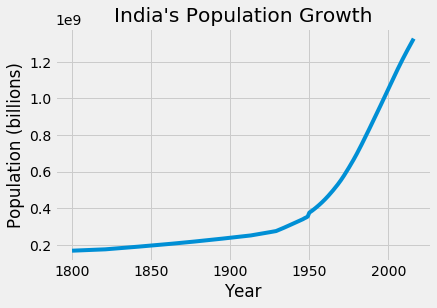

In [6]:
plt.plot(india.column("time"), india.column("population_total"))
plt.title("India's Population Growth")
plt.xlabel("Year")
plt.ylabel("Population (billions)")

As we can see, India's popuation is rising, and fast. Let's now look at the whole world's population.

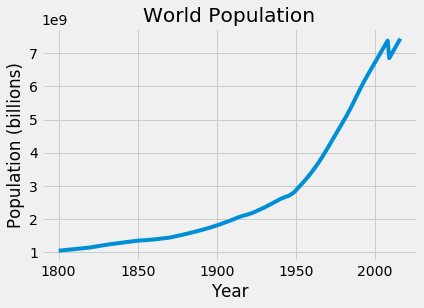

In [7]:
total_pop = population.group("time", sum).drop("geo sum").where("time", are.between(1800, 2017))
plt.plot(total_pop.column(0), total_pop.column(1))
plt.title("World Population")
plt.xlabel("Year")
plt.ylabel("Population (billions)")

Let's take a closer look at this by looking at *fertility rates*, which measure the amount of babies born. 

In [8]:
life_expectancy = Table.read_table('life_expectancy.csv')
child_mortality = Table.read_table('child_mortality.csv').relabeled(2, 'child_mortality_under_5_per_1000_born')
fertility = Table.read_table('fertility.csv')

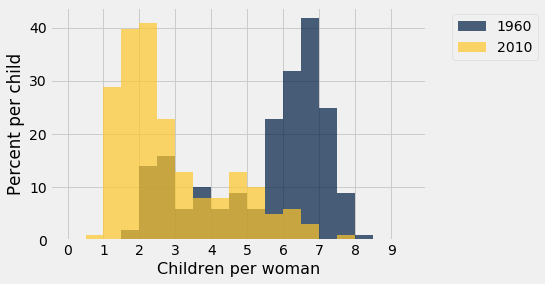

In [9]:
Table().with_columns(
    '1960', fertility.where('time', 1960).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child')
_ = plt.xlabel('Children per woman')
_ = plt.xticks(np.arange(10))


This figure shows us two overlaid *histograms*, one for 1960 and one for 2010, that show the *distributions* of total fertility rates for these two years among all 201 countries in the `fertility` table.

Let's look at the 50 most populous countries in 2010 (to make this run faster).

In [10]:
# We first create a population table that only includes the 
# 50 countries with the largest 2010 populations. We focus on 
# these 50 countries only so that plotting later will run faster.
big_50 = population.where('time', 2010).sort(2, descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', year).drop('time')
    f = fertility.where('time', year).drop('time').where("geo", are.contained_in(big_50))
    c = child_mortality.where('time', year).drop('time').where("geo", are.contained_in(big_50))
    return p.join('geo', f).join('geo', c)

Here, we create a table called `pop_by_decade` with two columns called `decade` and `population`. It has a row for each `year` since 1960 that starts a decade. The `population` column contains the total population of all countries included in the result of `stats_for_year(year)` for the first `year` of the decade. For example, 1960 is the first year of the 1960's decade. You should see that these countries contain most of the world's population.

In [11]:
decades = Table().with_column('decade', np.arange(1960, 2011, 10))

def pop_for_year(year):
    return sum(stats_for_year(year).column("population_total"))

pop_by_decade = decades.with_column("population",decades.apply(pop_for_year, 'decade'))
pop_by_decade.set_format(1, NumberFormatter)

decade,population
1960,"2,624,944,597"
1970,"3,211,487,418"
1980,"3,880,722,003"
1990,"4,648,434,558"
2000,"5,367,553,063"
2010,"6,040,810,517"


The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Run the cell below to inspect the data.

In [12]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column(0)))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
akr_a_dhe,Akrotiri and Dhekelia,europe_central_asia
alb,Albania,europe_central_asia
dza,Algeria,middle_east_north_africa
asm,American Samoa,east_asia_pacific
and,Andorra,europe_central_asia
ago,Angola,sub_saharan_africa
aia,Anguilla,america
atg,Antigua and Barbuda,america
arg,Argentina,america


After this, we create a table called `region_counts` that describes the count of how many countries in each region appear in the result of `stats_for_year(1960)`.

For example, one row would have `south_asia` as its `world_6region` value and an integer as its `count` value: the number of large South Asian countries for which we have population, fertility, and child mortality numbers from 1960.

In [13]:
top_50 = stats_for_year(1960)
region_counts = top_50.join("geo", countries, "country").group("world_6region").relabel("world_6region", "region")
region_counts

region,count
america,8
east_asia_pacific,10
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,10


The following diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world. Run the cell below. Do you think you can identify any of the dots?

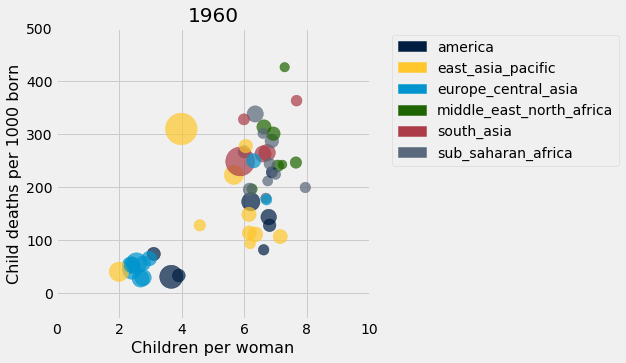

In [16]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabeled(2, 'Children per woman').relabeled(3, 'Child deaths per 1000 born')

def fertilty_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, colors=4, s=500)
    plt.xlim(0,10)
    plt.ylim(-50, 500)
    plt.title(year)

fertilty_vs_child_mortality(1960)

Drag the slider to the right to see how countries have changed over time. You'll find that the great divide between countries like America and Britain and countries like India and China that existed in the 1960's has nearly disappeared. This shift in fertility rates is the reason that the global population is expected to grow more slowly in the 21st century than it did in the 19th and 20th centuries.

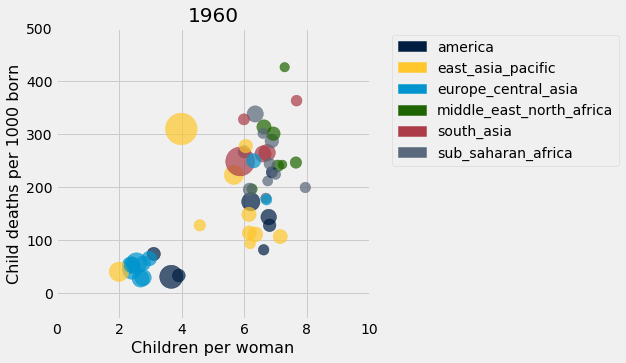

In [17]:
import ipywidgets as widgets

# This part takes a few minutes to run because it 
# computes 55 tables in advance: one for each year.
Table().with_column('Year', np.arange(1960, 2016)).apply(stats_relabeled, 'Year')

_ = widgets.interact(fertilty_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2015, value=1960))